# Import thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error

# READ DATA:

In [2]:
df0 = pd.read_csv('LandTrading.csv')
df0.head()

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,0,220.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,30000.0,136.363636,NaN,NaN,5e958ee8208d0d6d7648f9cc,Phố Linh Lang,10.0,Ngõ 4 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
1,1,500.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,195000.0,390.000000,NaN,NaN,5e958ee8208d0d6d7648f96d,Đường Cao Bá Quát,40.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e9,Phường Điện Biên
2,2,154.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,40000.0,259.740260,NaN,NaN,5e958ee8208d0d6d7648f978,Đường Đội Cấn,20.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ea,Phường Đội Cấn
3,3,116.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,14300.0,123.275862,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,8.0,Ngõ 3 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
4,4,195.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,26500.0,135.897436,NaN,NaN,5e958ee8208d0d6d7648f97a,Đường Giang Văn Minh,100.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ec,Phường Kim Mã


In [3]:
df1 = df0[(df0['ten_quan']== 'Quận Long Biên')|(df0['ten_quan']== 'Long Biên')]
df1.head()

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
12146,12146,500.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de2a,Quận Long Biên,NaN,12.00,...,67500.0,135.000000,NaN,NaN,5e958ee9208d0d6d7648fbf8,Đường Long Biên,NaN,NaN,5e5501cbeb80a7245175e113,Phường Long Biên
12147,12147,124.0,NaN,NaN,5e5501caeb80a7245175dddb,Hà Nội,5e5501caeb80a7245175de2a,Long Biên,NaN,NaN,...,5500.0,44.354839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12148,12148,52.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de2a,Quận Long Biên,NaN,5.17,...,2200.0,42.307692,NaN,NaN,5e958ee9208d0d6d7648fcc4,Đường Vũ Xuân Thiều,NaN,NaN,5e5501cbeb80a7245175e113,Phường Long Biên
12149,12149,76.6,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de2a,Quận Long Biên,NaN,6.07,...,6894.0,90.000000,NaN,NaN,5e958ee9208d0d6d7648fc0a,Đường Nguyễn Văn Cừ,NaN,NaN,5e5501cbeb80a7245175e113,Phường Long Biên
12150,12150,75.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de2a,Quận Long Biên,NaN,NaN,...,3750.0,50.000000,NaN,NaN,5e958ee9208d0d6d7648fcb2,Đường Tư Đình,NaN,NaN,5e5501cbeb80a7245175e113,Phường Long Biên


## DATA INFORMATION:

### INFORMATION:

In [4]:
df1.shape

(4304, 25)

In [5]:
df1.describe()

,Unnamed: 0,dien_tich,phong_ngu,so_tang,mat_tien,lat,long,gia,gia_m2,do_rong_duong
count,4304.000000,4.288000e+03,223.000000,244.000000,1729.000000,4302.000000,4302.000000,4.209000e+03,4.209000e+03,572.000000
mean,14297.500000,8.419675e+05,1.941704,1.889344,9.906698,21.037399,105.897121,7.027560e+05,1.206744e+04,8.409091
std,1242.602108,2.755555e+07,3.985470,1.584405,37.563081,0.215785,0.057842,4.470035e+07,7.706954e+05,14.983991
min,12146.000000,1.400000e-01,1.000000,1.000000,2.200000,11.065152,105.826205,4.500000e-03,2.259778e-06,1.000000
25%,13221.750000,4.700000e+01,1.000000,1.000000,4.000000,21.026428,105.882335,2.730000e+03,5.000000e+01,3.000000
50%,14297.500000,6.800000e+01,1.000000,1.000000,4.830000,21.043331,105.898051,4.550000e+03,6.444444e+01,5.000000
75%,15373.250000,9.630000e+01,2.000000,2.000000,6.000000,21.056363,105.909644,7.000000e+03,8.333333e+01,10.000000
max,16449.000000,9.071686e+08,58.000000,9.000000,670.000000,21.077924,108.422803,2.900000e+09,5.000000e+07,312.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 12146 to 16449
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4304 non-null   int64  
 1   dien_tich         4288 non-null   float64
 2   huong_ban_cong    9 non-null      object 
 3   phong_ngu         223 non-null    float64
 4   id_thanh_pho      4304 non-null   object 
 5   ten_thanh_pho     4304 non-null   object 
 6   id_quan           4304 non-null   object 
 7   ten_quan          4304 non-null   object 
 8   so_tang           244 non-null    float64
 9   mat_tien          1729 non-null   float64
 10  noi_that          18 non-null     object 
 11  huong_nha         1147 non-null   object 
 12  so_do             2770 non-null   object 
 13  lat               4302 non-null   float64
 14  long              4302 non-null   float64
 15  gia               4209 non-null   float64
 16  gia_m2            4209 non-null   flo

### DROP FEATURE:

In [7]:
df = df1.drop(['Unnamed: 0','id_thanh_pho','so_tang','ten_thanh_pho','id_quan','ten_quan','du_an','id_duong','id_phuong','project_name','huong_ban_cong','ten_duong','phong_ngu','noi_that','do_rong_duong','gia'],axis=1)

In [8]:
df.shape

(4304, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 12146 to 16449
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         4288 non-null   float64
 1   mat_tien          1729 non-null   float64
 2   huong_nha         1147 non-null   object 
 3   so_do             2770 non-null   object 
 4   lat               4302 non-null   float64
 5   long              4302 non-null   float64
 6   gia_m2            4209 non-null   float64
 7   do_rong_duong_ml  706 non-null    object 
 8   ten_phuong        3994 non-null   object 
dtypes: float64(5), object(4)
memory usage: 336.2+ KB


In [10]:
df.describe()

,dien_tich,mat_tien,lat,long,gia_m2
count,4.288000e+03,1729.000000,4302.000000,4302.000000,4.209000e+03
mean,8.419675e+05,9.906698,21.037399,105.897121,1.206744e+04
std,2.755555e+07,37.563081,0.215785,0.057842,7.706954e+05
min,1.400000e-01,2.200000,11.065152,105.826205,2.259778e-06
25%,4.700000e+01,4.000000,21.026428,105.882335,5.000000e+01
50%,6.800000e+01,4.830000,21.043331,105.898051,6.444444e+01
75%,9.630000e+01,6.000000,21.056363,105.909644,8.333333e+01
max,9.071686e+08,670.000000,21.077924,108.422803,5.000000e+07


# MISSING & OUTLIER:

## QUANTITATIVE VARIABLES:

### INFORMATION:

In [11]:
numeric_cols = [f for f in df.columns if df[f].dtype !="O"]
print('number of numeric field: ', len(numeric_cols))
print(numeric_cols)

number of numeric field:  5
['dien_tich', 'mat_tien', 'lat', 'long', 'gia_m2']


In [12]:
df[numeric_cols].head()

,dien_tich,mat_tien,lat,long,gia_m2
12146,500.0,12.00,21.030855,105.920818,135.000000
12147,124.0,NaN,21.054863,105.888497,44.354839
12148,52.0,5.17,21.046717,105.925595,42.307692
12149,76.6,6.07,21.049539,105.883412,90.000000
12150,75.0,NaN,21.028867,105.884004,50.000000


In [13]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 12146 to 16449
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dien_tich  4288 non-null   float64
 1   mat_tien   1729 non-null   float64
 2   lat        4302 non-null   float64
 3   long       4302 non-null   float64
 4   gia_m2     4209 non-null   float64
dtypes: float64(5)
memory usage: 201.8 KB


In [14]:
df[numeric_cols].describe()

,dien_tich,mat_tien,lat,long,gia_m2
count,4.288000e+03,1729.000000,4302.000000,4302.000000,4.209000e+03
mean,8.419675e+05,9.906698,21.037399,105.897121,1.206744e+04
std,2.755555e+07,37.563081,0.215785,0.057842,7.706954e+05
min,1.400000e-01,2.200000,11.065152,105.826205,2.259778e-06
25%,4.700000e+01,4.000000,21.026428,105.882335,5.000000e+01
50%,6.800000e+01,4.830000,21.043331,105.898051,6.444444e+01
75%,9.630000e+01,6.000000,21.056363,105.909644,8.333333e+01
max,9.071686e+08,670.000000,21.077924,108.422803,5.000000e+07


### MISSING:

,Total,Percent
mat_tien,2575,59.828067
gia_m2,95,2.207249
dien_tich,16,0.371747
lat,2,0.046468
long,2,0.046468


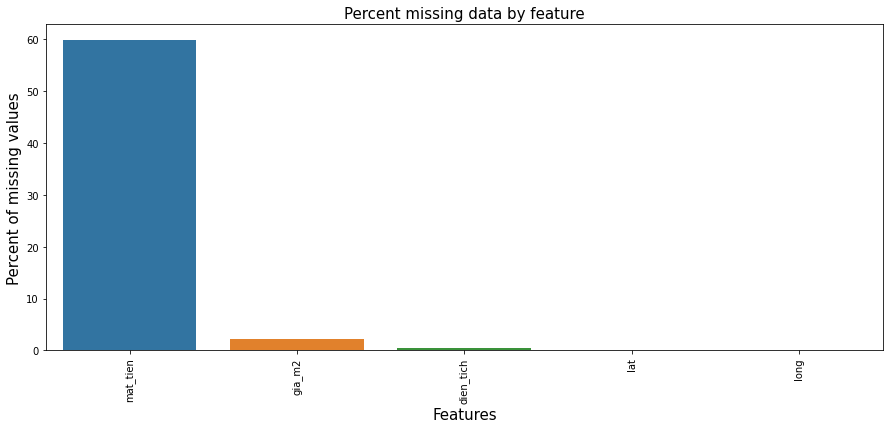

In [15]:
total = df[numeric_cols].isnull().sum().sort_values(ascending=False)
percent = (100*df[numeric_cols].isnull().sum()/df[numeric_cols].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

#### Mat_tien:

In [16]:
q1_mat_tien = df["mat_tien"].quantile(0.25)
q3_mat_tien = df["mat_tien"].quantile(0.75)
IQR_mat_tien = q3_mat_tien - q1_mat_tien

In [17]:
print(IQR_mat_tien)

2.0


In [18]:
df = df[~((df["mat_tien"] < (q1_mat_tien - 1.5 * IQR_mat_tien)) | (df["mat_tien"] > (q3_mat_tien + 1.5 *IQR_mat_tien)))]

In [19]:
df['mat_tien'].fillna(value=5,inplace=True)

<AxesSubplot:>

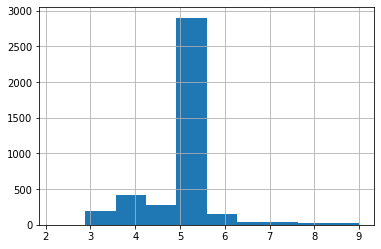

In [20]:
df['mat_tien'].hist()

#### gia/m2:

In [21]:
q1_gia_m2 = df["gia_m2"].quantile(0.25)
q3_gia_m2 = df["gia_m2"].quantile(0.75)
IQR_gia_m2 = q3_gia_m2 -q1_gia_m2

In [22]:
print(IQR_gia_m2)

33.11163101604279


In [23]:
df = df[~((df["gia_m2"] < (q1_gia_m2 - 1.5 * IQR_gia_m2)) | (df["gia_m2"] > (q3_gia_m2 + 1.5 *IQR_gia_m2)))]

In [24]:
df

,dien_tich,mat_tien,huong_nha,so_do,lat,long,gia_m2,do_rong_duong_ml,ten_phuong
12147,124.0,5.00,NaN,Đã có sổ,21.054863,105.888497,44.354839,NaN,NaN
12148,52.0,5.17,NaN,Đã có sổ đỏ đầy đủ pháp lý.,21.046717,105.925595,42.307692,NaN,Phường Long Biên
12149,76.6,6.07,Nam,NaN,21.049539,105.883412,90.000000,NaN,Phường Long Biên
12150,75.0,5.00,NaN,Sổ đỏ,21.028867,105.884004,50.000000,NaN,Phường Long Biên
12151,45.0,5.00,NaN,Sổ hồng/ Sổ đỏ,21.021684,105.895398,64.444444,Ngõ 1 ô tô,Phường Long Biên
...,...,...,...,...,...,...,...,...,...
16445,54.0,4.04,KXĐ,NaN,21.043721,105.925927,51.851852,NaN,NaN
16446,70.0,4.50,KXĐ,NaN,21.054863,105.888497,75.714286,Ngõ 4 ô tô trở lên,NaN
16447,90.5,4.10,Đông-Bắc,NaN,21.066537,105.859452,65.000000,Ngõ 2 ô tô tránh,NaN
16448,152.0,4.80,NaN,NaN,21.034519,105.874468,42.000000,NaN,Bồ Đề


In [25]:
df['gia_m2'].describe()

count    3751.000000
mean       65.593071
std        23.273782
min         0.340580
25%        50.000000
50%        62.121212
75%        79.907975
max       132.380952
Name: gia_m2, dtype: float64

In [26]:
df['gia_m2'].fillna(df['gia_m2'].median(),inplace=True)

#### dien_tich:

In [27]:
q1_dien_tich = df["dien_tich"].quantile(0.25)
q3_dien_tich = df["dien_tich"].quantile(0.75)
IQR_dien_tich = q3_dien_tich -q1_dien_tich

In [28]:
print(IQR_dien_tich)

44.0


In [29]:
df = df[~((df["dien_tich"] < (q1_dien_tich - 1.5 * IQR_dien_tich)) | (df["dien_tich"] > (q3_dien_tich + 1.5 *IQR_dien_tich)))]

In [30]:
df

,dien_tich,mat_tien,huong_nha,so_do,lat,long,gia_m2,do_rong_duong_ml,ten_phuong
12147,124.0,5.00,NaN,Đã có sổ,21.054863,105.888497,44.354839,NaN,NaN
12148,52.0,5.17,NaN,Đã có sổ đỏ đầy đủ pháp lý.,21.046717,105.925595,42.307692,NaN,Phường Long Biên
12149,76.6,6.07,Nam,NaN,21.049539,105.883412,90.000000,NaN,Phường Long Biên
12150,75.0,5.00,NaN,Sổ đỏ,21.028867,105.884004,50.000000,NaN,Phường Long Biên
12151,45.0,5.00,NaN,Sổ hồng/ Sổ đỏ,21.021684,105.895398,64.444444,Ngõ 1 ô tô,Phường Long Biên
...,...,...,...,...,...,...,...,...,...
16445,54.0,4.04,KXĐ,NaN,21.043721,105.925927,51.851852,NaN,NaN
16446,70.0,4.50,KXĐ,NaN,21.054863,105.888497,75.714286,Ngõ 4 ô tô trở lên,NaN
16447,90.5,4.10,Đông-Bắc,NaN,21.066537,105.859452,65.000000,Ngõ 2 ô tô tránh,NaN
16448,152.0,4.80,NaN,NaN,21.034519,105.874468,42.000000,NaN,Bồ Đề


In [31]:
df["dien_tich"].isnull().sum()

14

In [32]:
df['dien_tich'].fillna(df['dien_tich'].median(),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13300\2597677038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dien_tich'].fillna(df['dien_tich'].median(),inplace=True)


#### lat/long:

In [33]:
q1_long = df["long"].quantile(0.25)
q3_long = df["long"].quantile(0.75)
IQR_long = q3_long - q1_long

In [34]:
print(IQR_long)

0.026231899999999087


In [35]:
df = df[~((df["long"] < (q1_long - 1.5 * IQR_long)) | (df["long"] > (q3_long + 1.5 *IQR_long)))]

In [36]:
df["long"].isna().sum()

2

In [37]:
df["long"].fillna(df['long'].median(),inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13300\2429397662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["long"].fillna(df['long'].median(),inplace=True)


In [38]:
q1_lat = df["lat"].quantile(0.25)
q3_lat = df["lat"].quantile(0.75)
IQR_lat = q3_lat - q1_lat

In [39]:
print(IQR_lat)

0.030249400000002424


In [40]:
df = df[~((df["lat"] < (q1_lat - 1.5 * IQR_lat)) | (df["lat"] > (q3_lat + 1.5 *IQR_lat)))]

In [41]:
df["lat"].isna().sum()

2

In [42]:
df["lat"].fillna(df['lat'].median(),inplace=True)

In [43]:
df[numeric_cols].describe()

,dien_tich,mat_tien,lat,long,gia_m2
count,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000
mean,67.582921,4.888884,21.041893,105.896904,65.752610
std,27.462522,0.700273,0.017577,0.019387,22.871009
min,3.000000,2.200000,20.998585,105.845195,0.340580
25%,45.000000,5.000000,21.026428,105.883412,50.000000
50%,63.000000,5.000000,21.043331,105.898435,62.121212
75%,87.000000,5.000000,21.056677,105.909644,79.256788
max,156.000000,9.000000,21.077924,105.937625,132.380952


<AxesSubplot:>

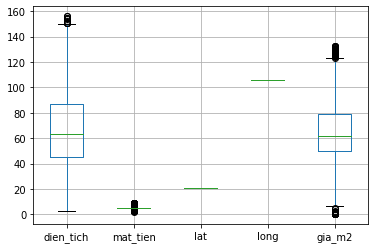

In [44]:
df[numeric_cols].boxplot()

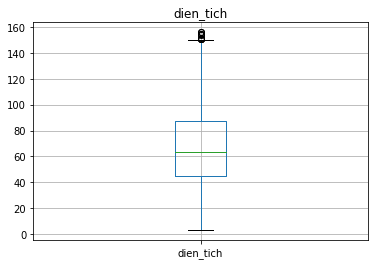

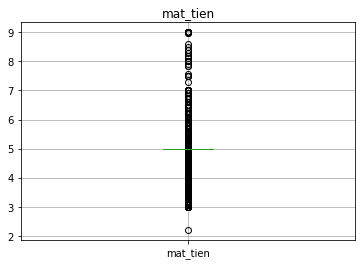

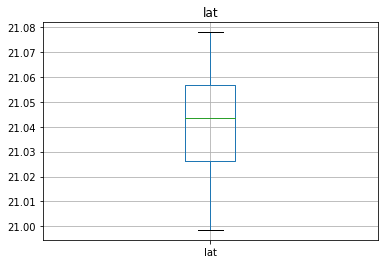

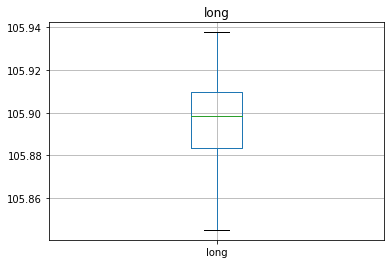

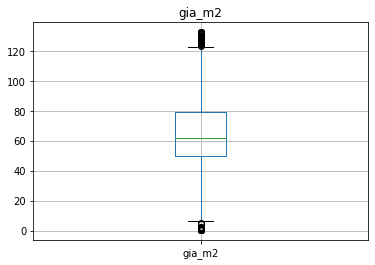

In [45]:
for col in numeric_cols:
  df.boxplot(column=[col])
  plt.title(col)
  plt.show()

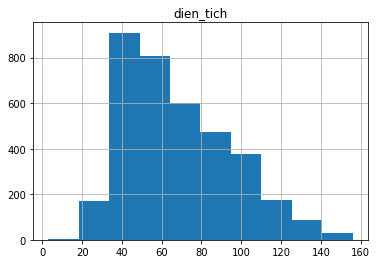

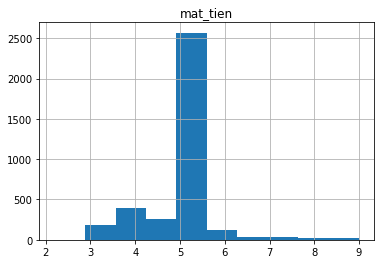

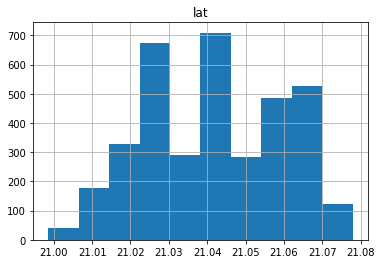

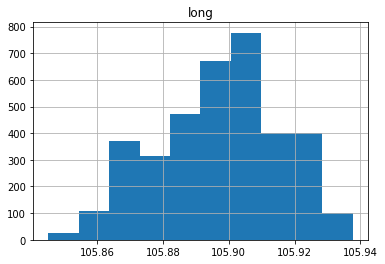

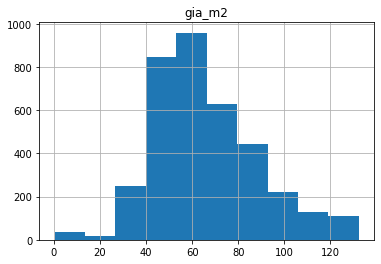

In [46]:
for col in numeric_cols:
  df[col].hist()
  plt.title(col)
  plt.show()

In [47]:
print('data còn lại: ' ,3639*100/4204)

data còn lại:  86.56041864890581


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

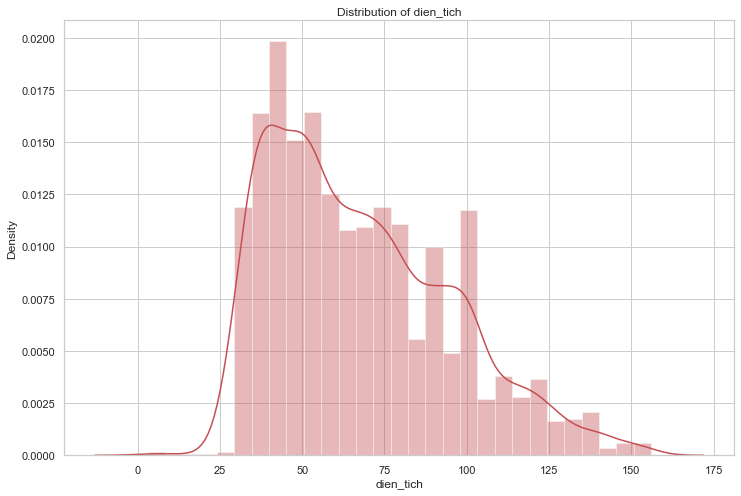

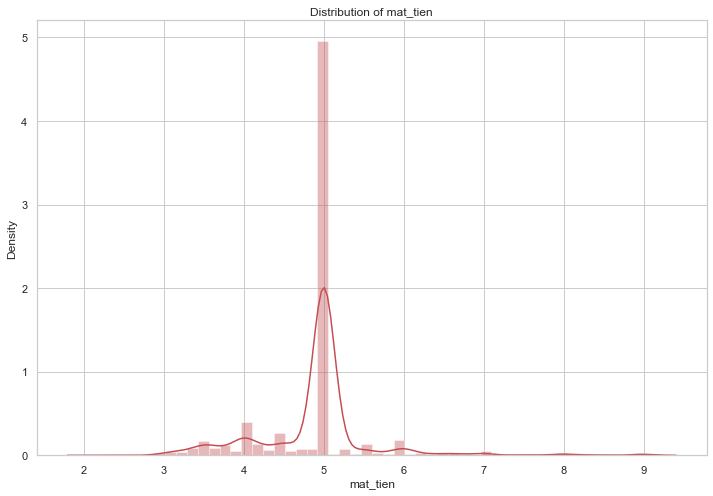

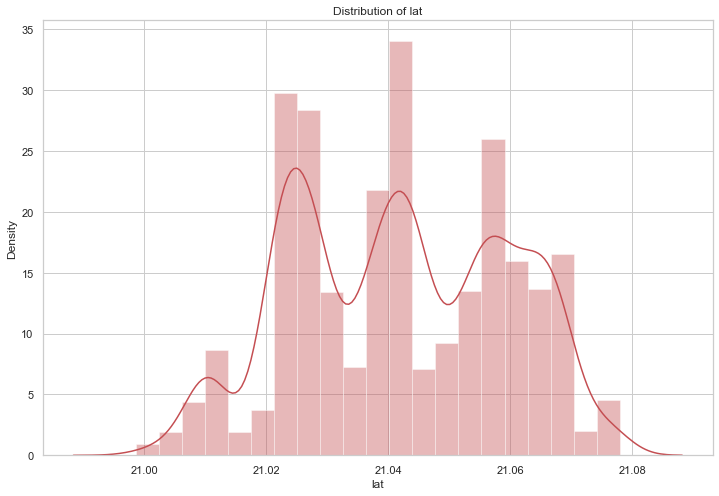

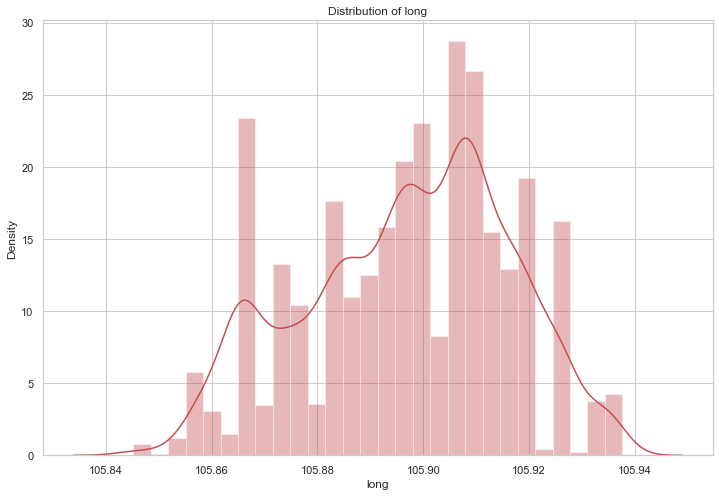

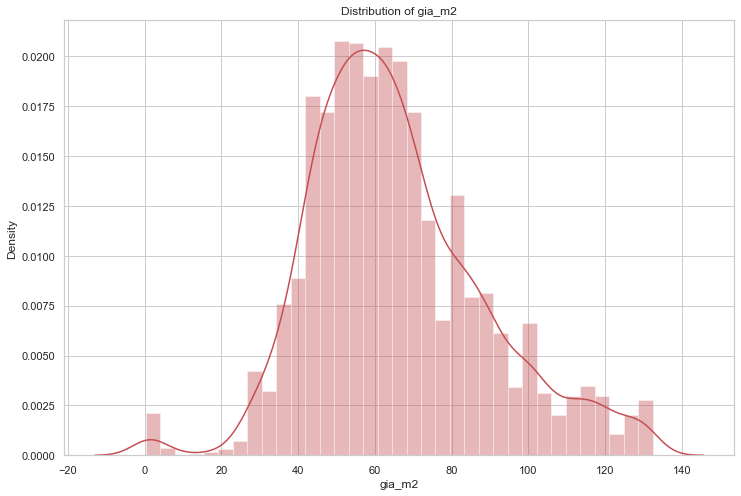

In [48]:
for col in df[numeric_cols]:
    sns.set(style='whitegrid')
    f, ax = plt.subplots(1,1, figsize=(12, 8))
    ax = sns.distplot(df[col], kde = True, color = 'r')
    plt.title(f'Distribution of {col}')

## QUALITATIVE VARIABLES:

### INFORMATION:

In [49]:
object_cols = [f for f in df.columns if df[f].dtype =="O"]
print('number of category field: ', len(object_cols))
print(object_cols)

number of category field:  4
['huong_nha', 'so_do', 'do_rong_duong_ml', 'ten_phuong']


In [50]:
df[object_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3639 entries, 12147 to 16449
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   huong_nha         961 non-null    object
 1   so_do             2374 non-null   object
 2   do_rong_duong_ml  609 non-null    object
 3   ten_phuong        3369 non-null   object
dtypes: object(4)
memory usage: 142.1+ KB


In [51]:
df[object_cols].describe()

,huong_nha,so_do,do_rong_duong_ml,ten_phuong
count,961,2374,609,3369
unique,13,148,6,16
top,KXĐ,Sổ đỏ,Ngõ 1 ô tô,Phường Long Biên
freq,258,1048,305,1359


### CLEAN DỮ LIỆU - XỬ LÝ MISSING DATA:

In [52]:
df['ten_phuong'].replace('Thạch Bàn','Phường Thạch Bàn',inplace=True)
df['ten_phuong'].replace('Bồ Đề','Phường Bồ Đề',inplace=True)

,Total,Percent
do_rong_duong_ml,3030,83.264633
huong_nha,2678,73.591646
so_do,1265,34.762297
ten_phuong,270,7.419621


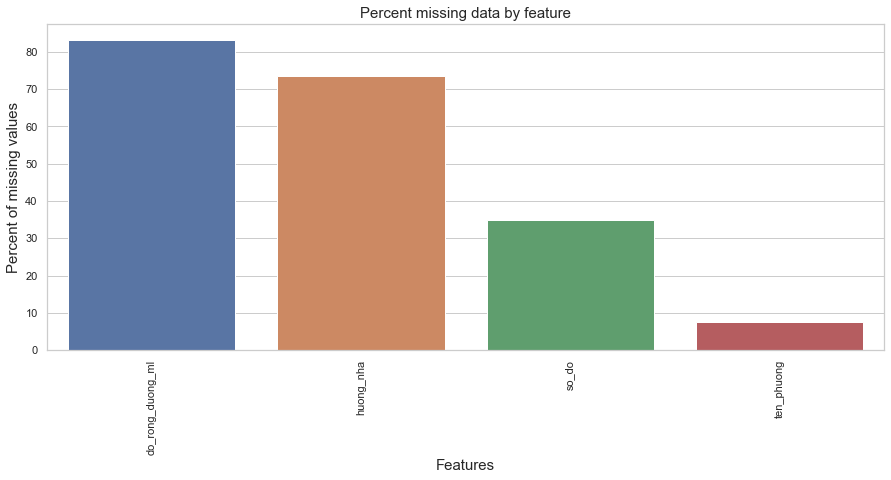

In [53]:
total = df[object_cols].isnull().sum().sort_values(ascending=False)
percent = (100*df[object_cols].isnull().sum()/df[object_cols].isnull().count()).sort_values(ascending=False)
missing_data_ob = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_ob.index, y=missing_data_ob['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data_ob

In [54]:
df['so_do'].unique()

array(['Đã có sổ', 'Đã có sổ đỏ đầy đủ pháp lý.', nan, 'Sổ đỏ',
       'Sổ hồng/ Sổ đỏ', 'Giấy tờ hợp lệ', 'Giấy tay', 'Sổ đỏ.',
       'Sổ đỏ chính chủ.', 'Sổ hồng', 'Đã có sổ.', 'Đã có sổ đỏ',
       'Sổ đỏ nở hậu.', 'Sổ đỏ chính chủ, ko tranh chấp, ko quy hoạch.',
       'Có sổ.', 'Sổ đẹp.', 'Đã có sổ đỏ.', 'Sổ đỏ chính chủ',
       'SỔ ĐỎ, PHÁP LÝ RÕ RÀNG', 'Sổ chính chủ', 'Sổ đỏ trong két.',
       'Sổ hồng.', 'Sổ đỏ sẵn sàng giao dịch.', 'Có sổ đỏ.',
       'Sổ Đỏ Chính Chủ',
       'Sổ đỏ chính chủ , pháp lý rõ ràng , không tranh chấp',
       'Sổ đỏ: Chính chủ, đất phân lô vuông đẹp, pháp lý đảm bảo',
       'Đã được cấp sổ đỏ.', 'Sổ đỏ chính chủ, pháp lý sạch', 'Sổ đỏ CC',
       'Sổ đỏ trao tay.', 'sổ đỏ chính chủ, sang tên nhanh chóng',
       'Sổ đỏ chính chủ, pháp lý chuẩn, giao dịch ngay',
       'Sổ đỏ chính chủ, pháp lý rõ ràng.', 'ĐÃ CÓ SỔ',
       'đầy đủ thông tin', 'Sổ đỏ lâu dài.', 'SĐCC',
       'Sổ đỏ pháp lý rõ ràng.',
       '- Sổ đỏ: chính chủ, đất phân lô, lô

In [55]:
df['so_do'].fillna(value=0,inplace=True)

In [56]:
df['sodo'] = np.where(df['so_do'] == 0,0,1)

In [57]:
df['sodo'].value_counts()

1    2374
0    1265
Name: sodo, dtype: int64

In [58]:
df['ten_phuong'].mode()

0    Phường Long Biên
Name: ten_phuong, dtype: object

In [59]:
df['ten_phuong'].fillna(value= 'Phường Long Biên',inplace=True)

In [60]:
df['huong_nha']= df['huong_nha'].str.replace('-', ' ')

In [61]:
df['huong_nha'].unique()

array([nan, 'Nam', 'Đông Bắc', 'Tây Bắc', 'Đông Nam', 'Tây Nam', 'Đông',
       'Bắc', 'KXĐ', 'Tây'], dtype=object)

In [62]:
df['huong_nha'].mode()

0    KXĐ
Name: huong_nha, dtype: object

In [63]:
df['huong_nha'].fillna(value='KXĐ',inplace=True)


In [64]:
df['do_rong_duong_ml'].mode()

0    Ngõ 1 ô tô
Name: do_rong_duong_ml, dtype: object

In [65]:
df['do_rong_duong_ml'].fillna(value='Ngõ 1 ô tô',inplace=True)

In [66]:
object_cols

['huong_nha', 'so_do', 'do_rong_duong_ml', 'ten_phuong']

In [67]:
object_cols[1]='sodo'

#### VISUALIZILATION:

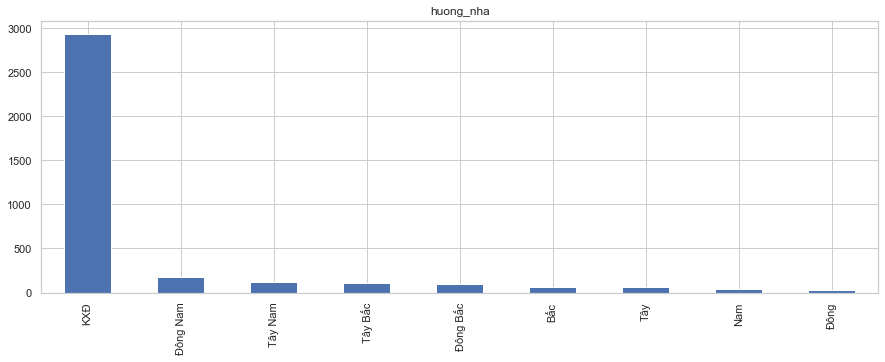

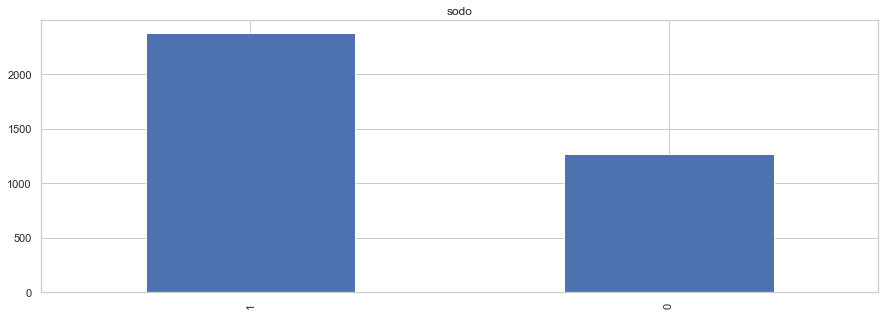

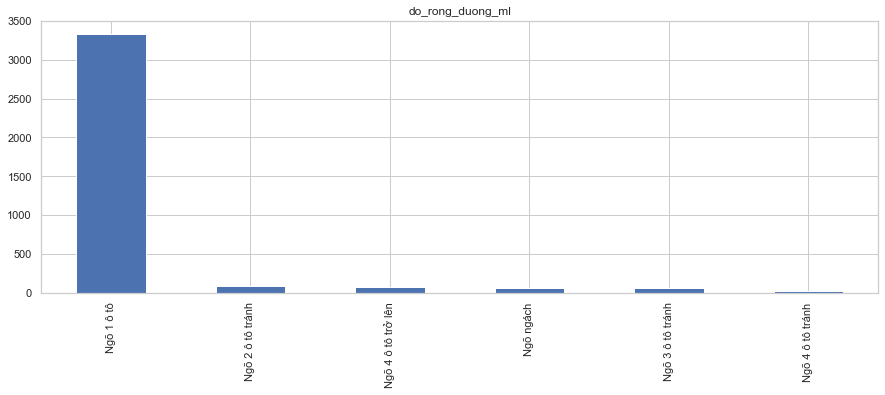

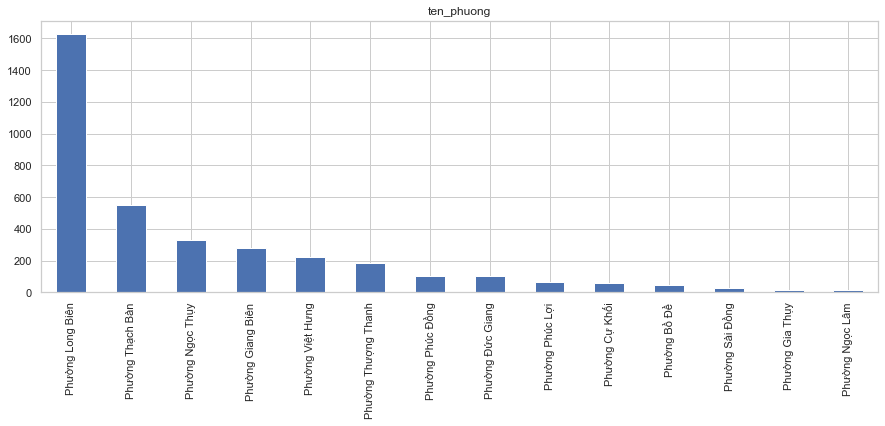

In [68]:
for col in object_cols:
  df[col].value_counts().plot(kind='bar', figsize=(15,5))
  plt.title(col)
  plt.show()

# DATA FOR LINEAR:

In [69]:
dataset_0 = df.copy()

In [70]:
dataset_0.drop(columns='so_do',inplace=True)
dataset_0.head()

,dien_tich,mat_tien,huong_nha,lat,long,gia_m2,do_rong_duong_ml,ten_phuong,sodo
12147,124.0,5.00,KXĐ,21.054863,105.888497,44.354839,Ngõ 1 ô tô,Phường Long Biên,1
12148,52.0,5.17,KXĐ,21.046717,105.925595,42.307692,Ngõ 1 ô tô,Phường Long Biên,1
12149,76.6,6.07,Nam,21.049539,105.883412,90.000000,Ngõ 1 ô tô,Phường Long Biên,0
12150,75.0,5.00,KXĐ,21.028867,105.884004,50.000000,Ngõ 1 ô tô,Phường Long Biên,1
12151,45.0,5.00,KXĐ,21.021684,105.895398,64.444444,Ngõ 1 ô tô,Phường Long Biên,1


In [71]:
dataset_0.shape

(3639, 9)

In [72]:
ob_cols= [f for f in dataset_0.columns if dataset_0[f].dtype =="O"]
print('number of category field of dataset_0: ', len(ob_cols))
print(ob_cols)

number of category field of dataset_0:  3
['huong_nha', 'do_rong_duong_ml', 'ten_phuong']


In [73]:
dataset_0[ob_cols].describe()

,huong_nha,do_rong_duong_ml,ten_phuong
count,3639,3639,3639
unique,9,6,14
top,KXĐ,Ngõ 1 ô tô,Phường Long Biên
freq,2936,3335,1629


In [74]:
dataset_0.describe()

,dien_tich,mat_tien,lat,long,gia_m2,sodo
count,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000
mean,67.582921,4.888884,21.041893,105.896904,65.752610,0.652377
std,27.462522,0.700273,0.017577,0.019387,22.871009,0.476281
min,3.000000,2.200000,20.998585,105.845195,0.340580,0.000000
25%,45.000000,5.000000,21.026428,105.883412,50.000000,0.000000
50%,63.000000,5.000000,21.043331,105.898435,62.121212,1.000000
75%,87.000000,5.000000,21.056677,105.909644,79.256788,1.000000
max,156.000000,9.000000,21.077924,105.937625,132.380952,1.000000


In [75]:
dataset_0.to_csv('Land_Price_Predict.csv')

## RECODE CATEGORICAL FEATURE:

In [81]:
dataset1 = pd.get_dummies(data=dataset_0,columns=['huong_nha','ten_phuong','do_rong_duong_ml'])

In [82]:
dataset1

,dien_tich,mat_tien,lat,long,gia_m2,sodo,huong_nha_Bắc,huong_nha_KXĐ,huong_nha_Nam,huong_nha_Tây,...,ten_phuong_Phường Thượng Thanh,ten_phuong_Phường Thạch Bàn,ten_phuong_Phường Việt Hưng,ten_phuong_Phường Đức Giang,do_rong_duong_ml_Ngõ 1 ô tô,do_rong_duong_ml_Ngõ 2 ô tô tránh,do_rong_duong_ml_Ngõ 3 ô tô tránh,do_rong_duong_ml_Ngõ 4 ô tô tránh,do_rong_duong_ml_Ngõ 4 ô tô trở lên,do_rong_duong_ml_Ngõ ngách
12147,124.0,5.00,21.054863,105.888497,44.354839,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
12148,52.0,5.17,21.046717,105.925595,42.307692,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
12149,76.6,6.07,21.049539,105.883412,90.000000,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12150,75.0,5.00,21.028867,105.884004,50.000000,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
12151,45.0,5.00,21.021684,105.895398,64.444444,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16445,54.0,4.04,21.043721,105.925927,51.851852,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
16446,70.0,4.50,21.054863,105.888497,75.714286,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
16447,90.5,4.10,21.066537,105.859452,65.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16448,152.0,4.80,21.034519,105.874468,42.000000,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
dataset = dataset1.copy()

## Correlation:

In [84]:
# View correlation
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,dien_tich,mat_tien,lat,long,gia_m2,sodo,huong_nha_Bắc,huong_nha_KXĐ,huong_nha_Nam,huong_nha_Tây,huong_nha_Tây Bắc,huong_nha_Tây Nam,huong_nha_Đông,huong_nha_Đông Bắc,huong_nha_Đông Nam,ten_phuong_Phường Bồ Đề,ten_phuong_Phường Cự Khối,ten_phuong_Phường Gia Thụy,ten_phuong_Phường Giang Biên,ten_phuong_Phường Long Biên,ten_phuong_Phường Ngọc Lâm,ten_phuong_Phường Ngọc Thụy,ten_phuong_Phường Phúc Lợi,ten_phuong_Phường Phúc Đồng,ten_phuong_Phường Sài Đồng,ten_phuong_Phường Thượng Thanh,ten_phuong_Phường Thạch Bàn,ten_phuong_Phường Việt Hưng,ten_phuong_Phường Đức Giang,do_rong_duong_ml_Ngõ 1 ô tô,do_rong_duong_ml_Ngõ 2 ô tô tránh,do_rong_duong_ml_Ngõ 3 ô tô tránh,do_rong_duong_ml_Ngõ 4 ô tô tránh,do_rong_duong_ml_Ngõ 4 ô tô trở lên,do_rong_duong_ml_Ngõ ngách
dien_tich,1.000000,0.276493,0.011140,-0.064635,0.074448,0.045311,-0.026822,0.076669,-0.009529,-0.028325,0.027592,-0.043798,-0.016268,-0.044433,-0.048554,0.016539,-0.000082,-0.034843,-0.011742,0.043698,-0.045726,0.065311,-0.027902,0.052578,-0.014657,-0.001705,-0.118852,0.009213,0.017901,-0.005935,0.040994,0.005883,0.019014,0.039572,-0.093670
mat_tien,0.276493,1.000000,-0.044627,-0.033585,0.052857,0.084244,-0.004127,0.122679,-0.040250,-0.041307,-0.017408,-0.070376,-0.049032,-0.061535,-0.039319,0.011549,0.020721,0.010872,-0.016799,-0.047241,0.010210,0.032852,0.026536,0.051270,0.016724,0.000922,-0.016149,0.021942,-0.000949,0.068724,-0.054249,-0.062995,0.019993,0.037690,-0.073065
lat,0.011140,-0.044627,1.000000,-0.225041,0.021606,-0.081525,-0.031242,0.010053,-0.027079,-0.030619,0.014742,0.027711,-0.009559,-0.036217,0.028283,-0.023630,-0.225768,0.033218,0.306909,-0.268534,0.012849,0.291626,0.009476,-0.023820,-0.035976,0.321265,-0.430120,0.199530,0.228226,-0.062818,0.029785,0.016135,-0.025608,0.021159,0.072737
long,-0.064635,-0.033585,-0.225041,1.000000,-0.112878,-0.017395,0.056528,-0.092547,0.029551,0.012996,0.023938,0.068322,0.029588,0.027106,0.005580,-0.127327,0.054072,-0.044287,0.338253,-0.093210,-0.085428,-0.521634,0.213681,0.029208,0.075043,-0.079993,0.251101,0.034521,0.009838,-0.048489,-0.003840,0.002729,-0.003021,0.066285,0.033780
gia_m2,0.074448,0.052857,0.021606,-0.112878,1.000000,0.075674,-0.050842,-0.011533,-0.015537,0.010127,0.029710,0.022656,0.009498,0.000266,0.006593,0.110963,-0.005100,0.073307,0.030225,0.061458,0.011334,-0.049523,-0.068638,0.005695,0.010383,-0.063313,-0.099344,0.077606,-0.021771,-0.073183,0.024268,0.071065,0.069719,0.113488,-0.101133
sodo,0.045311,0.084244,-0.081525,-0.017395,0.075674,1.000000,-0.033208,0.059373,-0.025956,-0.026047,0.000936,-0.028498,-0.003646,-0.042537,-0.004587,0.047725,0.054859,0.024622,0.056361,-0.145898,0.019944,0.014174,0.045334,0.020067,0.027667,0.010469,0.014260,0.061399,0.024976,0.328097,-0.179550,-0.110321,-0.075226,-0.154049,-0.167319
huong_nha_Bắc,-0.026822,-0.004127,-0.031242,0.056528,-0.050842,-0.033208,1.000000,-0.269052,-0.014054,-0.017190,-0.023569,-0.023890,-0.012003,-0.021902,-0.030208,-0.015060,0.015890,-0.009020,0.049853,-0.024573,-0.008470,-0.034261,-0.018168,-0.022804,-0.011168,-0.001789,0.057230,0.001776,-0.022244,-0.044669,0.034143,0.000792,-0.009538,0.010794,0.046374
huong_nha_KXĐ,0.076669,0.122679,0.010053,-0.092547,-0.011533,0.059373,-0.269052,1.000000,-0.218153,-0.266836,-0.365846,-0.370828,-0.186323,-0.339978,-0.468907,0.043644,0.020518,0.023316,-0.097061,-0.021419,0.009753,0.065222,0.016123,0.018533,0.024981,-0.037435,-0.029057,0.043765,0.053015,0.083698,0.009884,-0.029301,-0.003182,-0.090690,-0.060136
huong_nha_Nam,-0.009529,-0.040250,-0.027079,0.029551,-0.015537,-0.025956,-0.014054,-0.218153,1.000000,-0.013938,-0.019110,-0.019370,-0.009733,-0.017759,-0.024493,-0.012211,0.006342,-0.007313,0.057310,0.008620,-0.006868,-0.024713,-0.014731,-0.018490,-0.009056,-0.013053,0.020474,-0.027274,-0.018036,-0.005409,-0.016902,-0.013345,-0.007734,0.057817,-0.014396
huong_nha_Tây,-0.028325,-0.041307,-0.030619,0.012996,0.010127,-0.026047,-0.017190,-0.266836,-0.013938,1.000000,-0.023375,-0.023693,-0.011905,-0.021722,-0.

## SCALE DATA:

In [85]:
X = dataset.drop(columns='gia_m2',axis=1)
y = dataset['gia_m2']

In [86]:
scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_scaler = scaler.fit_transform(X)

In [87]:
#Check X
X.shape

(3639, 34)

In [88]:
#Check y
y.shape

(3639,)

In [89]:
y=y.values

In [90]:
y= y.reshape(-1,1)
y.shape

(3639, 1)

# REGRESSION:

In [91]:
# Chia train, test:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [92]:
X_train.shape

(2911, 34)

In [93]:
X_test.shape

(728, 34)

In [94]:
from sklearn.linear_model import LinearRegression
#Create a regressor object
model_reg= LinearRegression()
#Fit training set to the regressor
model_reg.fit(X_train,y_train)

LinearRegression()

In [98]:
# use model
y_prediction = model_reg.predict(X_test)

In [99]:
score=r2_score(y_test,y_prediction)
print('R2-score is ',score)
print('Mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('Root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

R2-score is  0.09924066361863737
Mean_sqrd_error is== 500.7569793998331
Root_mean_squared error of is== 22.37759994726497


In [100]:
model_reg.score(X_train,y_train)

0.1113964089860554

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
model_dtr = DecisionTreeRegressor(random_state=0)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [103]:
pred = model_dtr.predict(X_test)
print("MAPE: ", mean_absolute_percentage_error(y_test, pred))

MAPE:  0.9086796559867881


In [ ]:
# dien_tich ---- mat_tien ---- lat ---- long ---- huong_nha ---- sodo ---- do_rong_duong_ml ---- ten_phuong
